In [1]:
import pandas as pd
import numpy as np

np.random.seed(1234)

X = pd.DataFrame({
    'feature1': np.random.normal(0, 1, 300),
    'feature2': np.random.normal(5, 2, 300),
    'feature3': np.random.uniform(0, 10, 300),
    'feature4': np.random.randint(0, 100, 300),
    'feature5': np.random.binomial(1, 0.3, 300)
})

y = pd.Series(np.random.choice([0, 1, 2, 3, 4], size=300), name='target')

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [ ]:
# multi_class 옵션은 다중 클래스 분류 문제를 어떻게 처리할지를 지정하는 매개변수
# 클래스가 3개 이상일 때 의미가 있으며, 이진 분류일 때는 크게 영향을 주지 않는다.

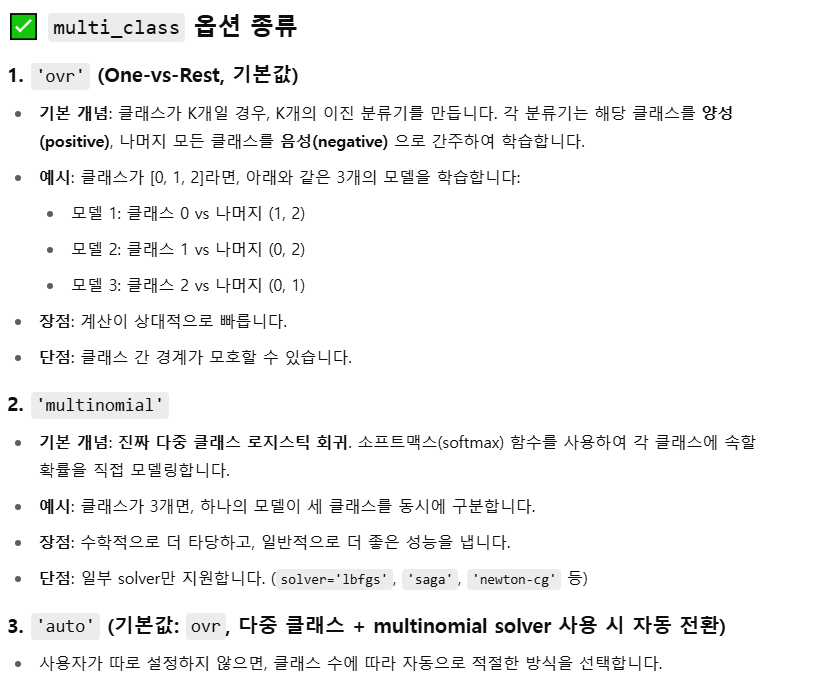

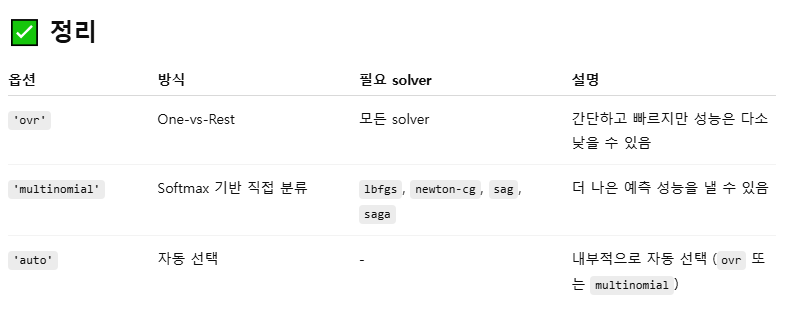

In [ ]:
# solver = 최적화 알고리즘(Optimizer)을 지정하는 옵션
# 로지스틱 회귀 모델의 가중치(weight)를 학습하는 방식에 직접적인 영향을 주는 옵션

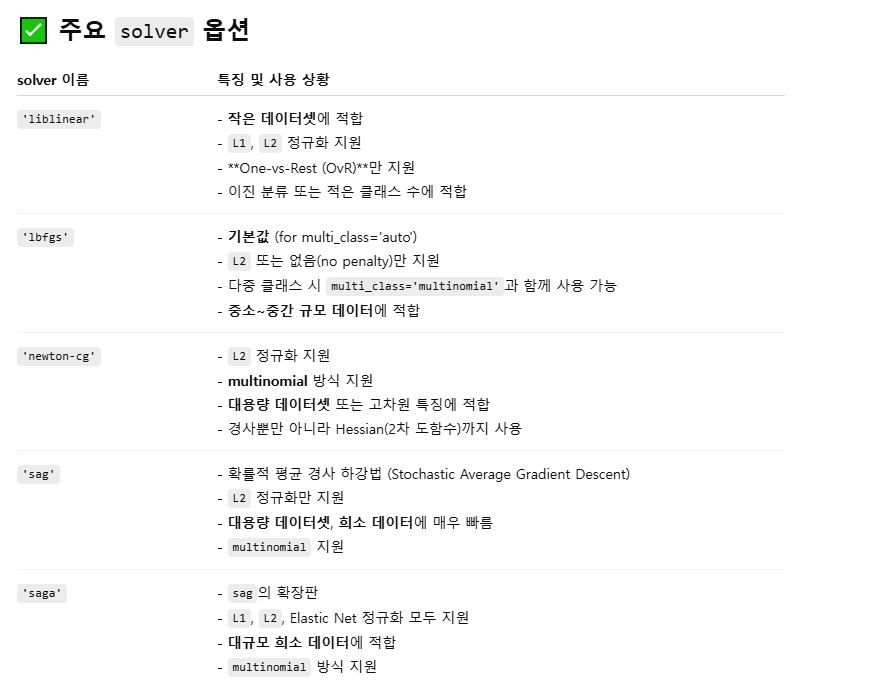
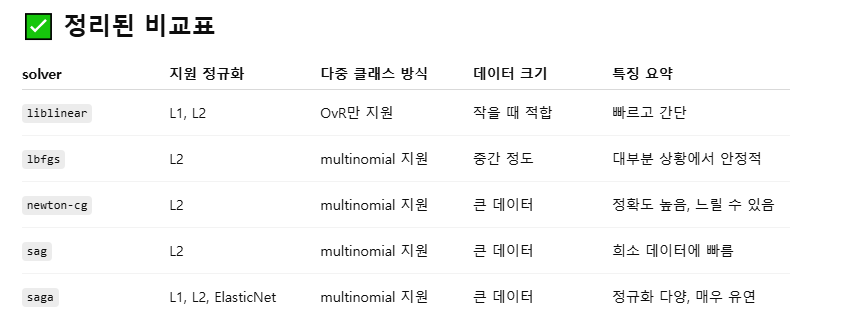

In [3]:
# 학습
from sklearn.linear_model import LogisticRegression

# C=1.0 (default, 약한 규제, 복잡한 모델) : 정규화 파라미터 lambda
# C=0.01 강한 규제(단순 모델)
# 과대합이 의심되면 C를 낮추고, 과소적합이라면 C를 높이면 된다.

# fit_intercept=True : 절편을 포함하여 학습

model = LogisticRegression(multi_class='ovr', solver='liblinear', C=1.0)
model.fit(X_train, y_train)

print("Intercept (절편):", model.intercept_)
print("Coefficients (계수):", model.coef_)

Intercept (절편): [-0.83689391 -0.37493214 -1.75232432 -0.83214001 -1.30450606]
Coefficients (계수): [[ 0.09067429 -0.0669167   0.00685517 -0.00278215 -0.25913   ]
 [-0.02127328 -0.02399738 -0.0541431  -0.00782784 -0.25851847]
 [ 0.11367997  0.06975963  0.01254049  0.00263153 -0.57730309]
 [-0.21220013 -0.10376254 -0.04051438 -0.0072333   0.4338482 ]
 [-0.03682995 -0.07717862  0.0015754   0.00549018  0.50474849]]


In [10]:
print("클래스 수:", len(model.classes_))
print("입력 변수 개수:", X.shape[1])
print("계수 shape:", model.coef_.shape)

클래스 수: 5
입력 변수 개수: 5
계수 shape: (5, 5)


In [4]:
# 예측
y_pred = model.predict(X_test)
y_pred

array([1, 2, 2, 1, 1, 2, 4, 2, 1, 4, 1, 2, 4, 4, 4, 1, 4, 2, 2, 1, 2, 2,
       0, 2, 2, 1, 4, 2, 1, 1, 4, 1, 1, 1, 1, 1, 4, 4, 4, 2, 2, 2, 1, 1,
       1, 4, 2, 0, 2, 3, 1, 0, 1, 4, 4, 2, 4, 1, 2, 1])

In [6]:
# 평가
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. 전체 분류 리포트 (Precision, Recall, F1-score)
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# 2. 정확도
print("Accuracy:", accuracy_score(y_test, y_pred))

# 3. 혼동 행렬
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

           0       0.33      0.06      0.11        16
           1       0.32      0.58      0.41        12
           2       0.26      0.38      0.31        13
           3       0.00      0.00      0.00         9
           4       0.20      0.30      0.24        10

    accuracy                           0.27        60
   macro avg       0.22      0.27      0.21        60
weighted avg       0.24      0.27      0.22        60

Accuracy: 0.26666666666666666
Confusion Matrix:
 [[1 6 7 0 2]
 [0 7 2 1 2]
 [1 1 5 0 6]
 [0 4 3 0 2]
 [1 4 2 0 3]]


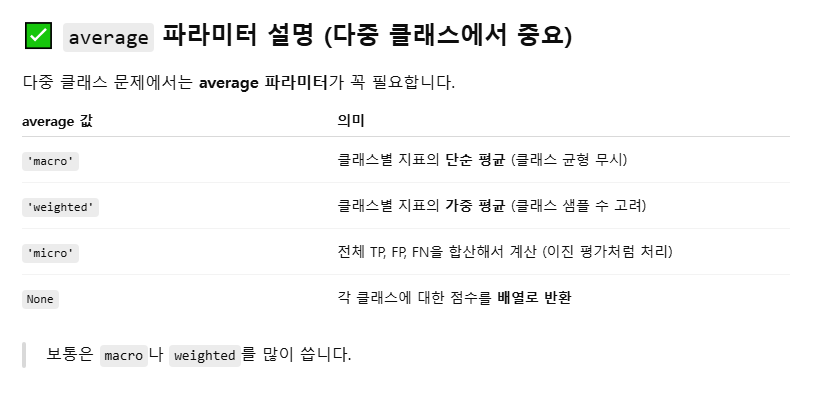

In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='macro')
rec = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1 Score : {f1:.4f}")

Accuracy : 0.2667
Precision: 0.2229
Recall   : 0.2661
F1 Score : 0.2139


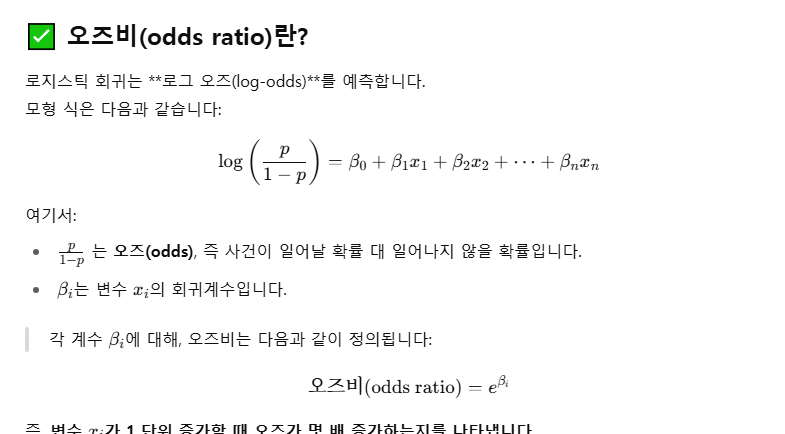

In [9]:
# 오즈비
odds_ratios = np.exp(model.coef_)
odds_ratios

array([[1.09491232, 0.93527311, 1.00687872, 0.99722172, 0.77172269],
       [0.9789514 , 0.97628826, 0.94729654, 0.99220272, 0.77219477],
       [1.12039351, 1.07225041, 1.01261945, 1.002635  , 0.5614104 ],
       [0.80880282, 0.90143933, 0.96029535, 0.9927928 , 1.5431846 ],
       [0.96384003, 0.92572449, 1.00157664, 1.00550528, 1.65656882]])

In [11]:
# 오즈비의 절댓값의 최댓값
abs(odds_ratios).max()

1.6565688244317747